#Метод кластеризации «k-means»
Метод требует указать, на сколько кластеров k требуется разбить множество объектов (точек, экземпляров).

 Суть метода:
1.	Задается количество кластеров k.
2.	 «Случайно» выбираются их центры.
3.	Определяется, к какому кластеру k очередная точка (объект) ближе по выбранной нами мере. Точка переносится в соответствующий кластер. Пункт 3 повторяется для всех точек.
4.	После того как все точки нашли своего нового «хозяина», пересчитываются центры изменившихся кластеров, например, как центры тяжести всех точек, которые содержит кластер.
5.	Пункты 3-4 повторяются до тех пор, пока точки не перестают переходить из кластера в кластер (или центры кластеров перестают смещаться).


К недостаткам метода относят его чувствительность к ошибкам в определении положения точек, которые существенно влияют на их распределение, и необходимость исследователю самому решать, сколько кластеров k содержит распределение точек. К тому же неудачное первое распределение центров тяжести будущих кластеров может привести к отказу метода.

Кластерный анализ – метод группировки совокупности объектов по значениям
признаков для получения нескольких более или менее однородных плотных групп, четко
отличающихся друг от друга, распределение объектов по классам.

Для кластерного анализа необходимо определить:
- пространство признаков (осей координат),
- предметы, как точки этого пространства (экземпляры), экземпляры обладают
свойствами (конкретными числовыми значениями признаков на осях координат),
- метрику – способ измерения расстояния между двумя предметами в пространстве(сходства-различия),
- критерий (правило принятия решения) объединения предметов в класс по метрике.

Для определения расстояния была выбрана Евклидова метрика: $R(x_i,x_j)=√((x_ai-x_aj)^2+(x_bi-x j)^2$
)

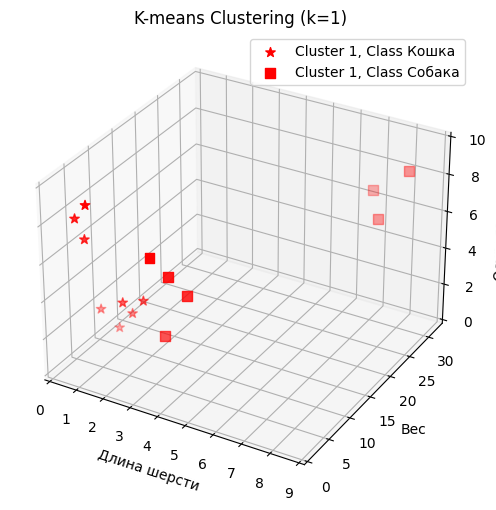

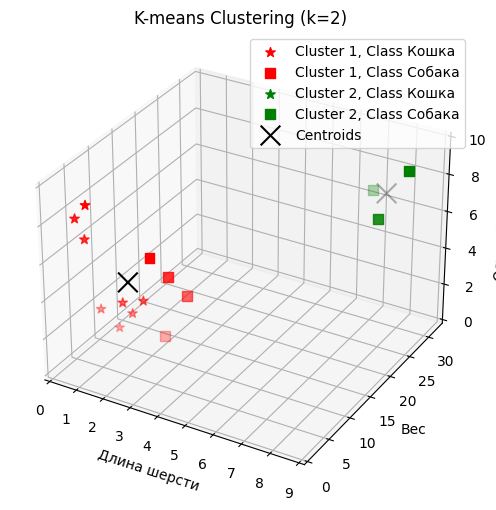

Суммарная ошибка E(k=2): 39.35


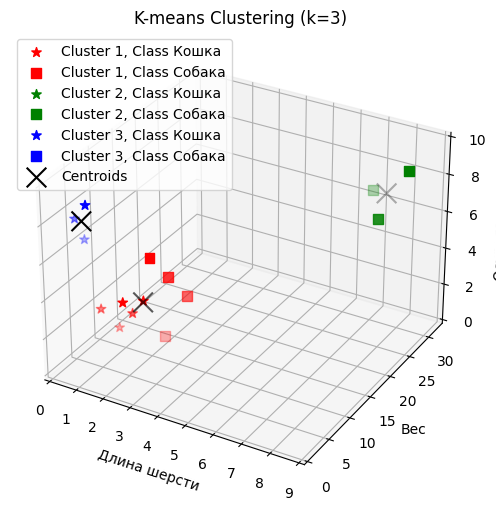

Суммарная ошибка E(k=3): 25.03


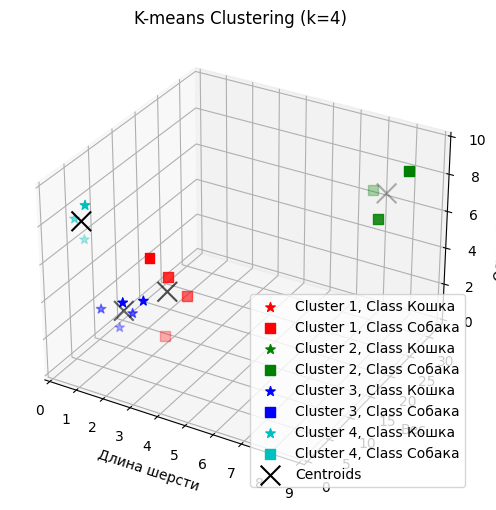

Суммарная ошибка E(k=4): 19.63


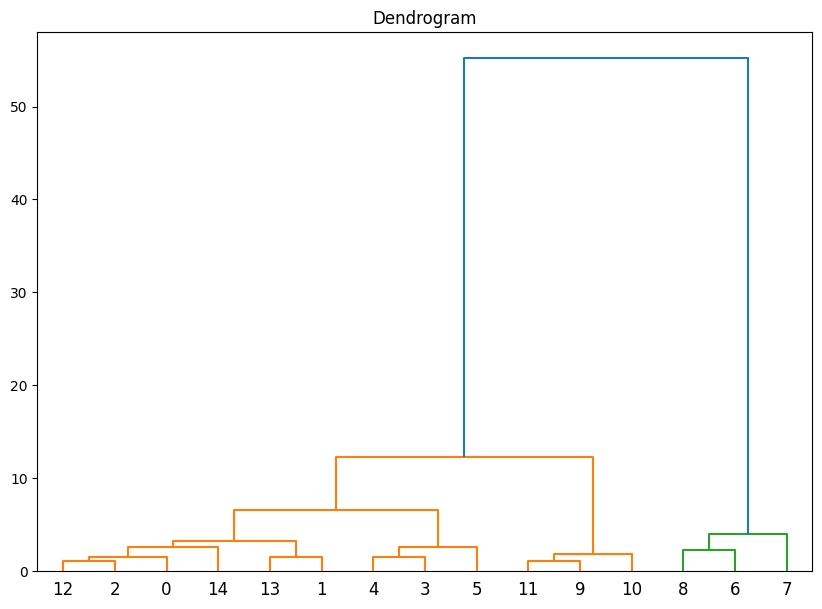

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Признаки: длина шерсти, вес, острота когтей (1-10)
data = np.array([
    [1, 5, 3],  # Кошка 1
    [2, 4, 4],  # Кошка 2
    [1.5, 6, 2],  # Кошка 3
    [3, 8, 5],  # Собака 1
    [2.5, 7, 6],  # Собака 2
    [3.5, 9, 4],  # Собака 3
    [7, 30, 7],  # Собака 4 (крупная порода)
    [8, 32, 8],  # Собака 5 (крупная порода)
    [7.5, 28, 6],  # Собака 6 (крупная порода)
    [0.5, 3, 8],  # Кошка 4 (порода с острыми когтями)
    [1, 2.5, 9],  # Кошка 5 (порода с острыми когтями)
    [0.8, 3.2, 7],  # Кошка 6 (порода с острыми когтями)
    [2, 6, 3],  # Кошка 7
    [2.5, 5.5, 4],  # Кошка 8
    [3, 7, 2]   # Собака 7
])

# Определяем классы животных (0 - кошка, 1 - собака)
animal_classes = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])
classes = {0:"Кошка", 1: "Собака"}

# Функция для визуализации кластеров
def visualize_clusters(data, labels, k, centers=None, animal_classes=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Яркие цвета для кластеров
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    # Маркеры для разных классов животных
    markers = ['*', 's']  # * - кошки, s - собаки

    # Отображение точек с разными цветами и маркерами
    for i in range(k):
        for j in np.unique(animal_classes):
            indices = np.where((labels == i) & (animal_classes == j))[0]
            ax.scatter(data[indices, 0], data[indices, 1], data[indices, 2],
                       c=colors[i], marker=markers[j], label=f'Cluster {i+1}, Class {classes[j]}', s=50)

    # Отображение центров кластеров
    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
                   c='black', marker='x', s=200, label='Centroids')

    # Настройка осей
    ax.set_xlabel("Длина шерсти")
    ax.set_ylabel("Вес")
    ax.set_zlabel("Острота когтей", rotation=90)
    ax.set_xlim([0, max(data[:, 0]) + 1])
    ax.set_ylim([0, max(data[:, 1]) + 1])
    ax.set_zlim([0, max(data[:, 2]) + 1])

    plt.title(f"K-means Clustering (k={k})")
    plt.legend()
    plt.show()

# Функция для вычисления суммарной ошибки E(k)
def calculate_error(X, labels, centers):
    distances = [np.linalg.norm(X[i] - centers[labels[i]]) for i in range(len(X))]
    return sum(distances)

# Визуализация исходных данных
visualize_clusters(data, np.zeros(len(data)), 1, animal_classes=animal_classes) # Все точки в одном "кластере"

# Кластеризация для k = 2, 3, 4
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)

    # Визуализация кластеров с центрами
    visualize_clusters(data, labels, k, kmeans.cluster_centers_, animal_classes=animal_classes)

    error = calculate_error(data, labels, kmeans.cluster_centers_)
    print(f"Суммарная ошибка E(k={k}): {error:.2f}")

# Построение дендрограммы
linked = linkage(data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()

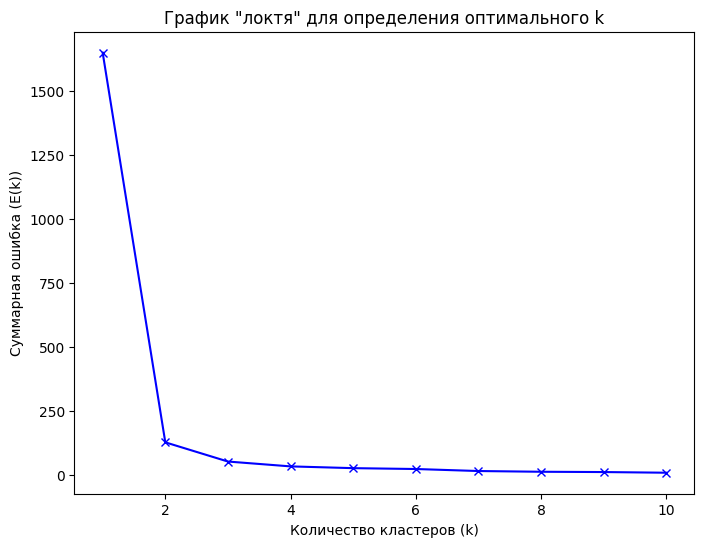

In [ ]:
# График зависимости ошибки от количества кластеров
errors = []
k_range = range(1, 11)  # Проверяем k от 1 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    errors.append(kmeans.inertia_)  # inertia_ содержит сумму квадратов расстояний

plt.figure(figsize=(8, 6))
plt.plot(k_range, errors, 'bx-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Суммарная ошибка (E(k))')
plt.title('График "локтя" для определения оптимального k')
plt.show()

Больше 4 не имеет смысла брать кластеры, тк значение ошибки перестает уменьшаться

#Работа с датасетом Customer Segmentation Dataset Unsupervised Learning Online Retail Customer Segmentation Online Retail(542k rows)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA


In [ ]:
df = pd.read_excel("/content/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print("Number of Columns in the Data: ", df.shape[1])
print("Number of Rows in the Data: ", df.shape[0])

Number of Columns in the Data:  8
Number of Rows in the Data:  541909


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.duplicated().sum()

5268

# EDA

In [ ]:
des = df.describe().transpose()
palette = sns.color_palette("icefire", as_cmap=True)
des.style.background_gradient(cmap=palette)

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.000000,9.552250,-80995.000000,1.000000,3.000000,10.000000,80995.000000,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,nan
UnitPrice,541909.000000,4.611114,-11062.060000,1.250000,2.080000,4.130000,38970.000000,96.759853
CustomerID,406829.000000,15287.690570,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000,1713.600303


<ipython-input-8-4521e13cf27b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')


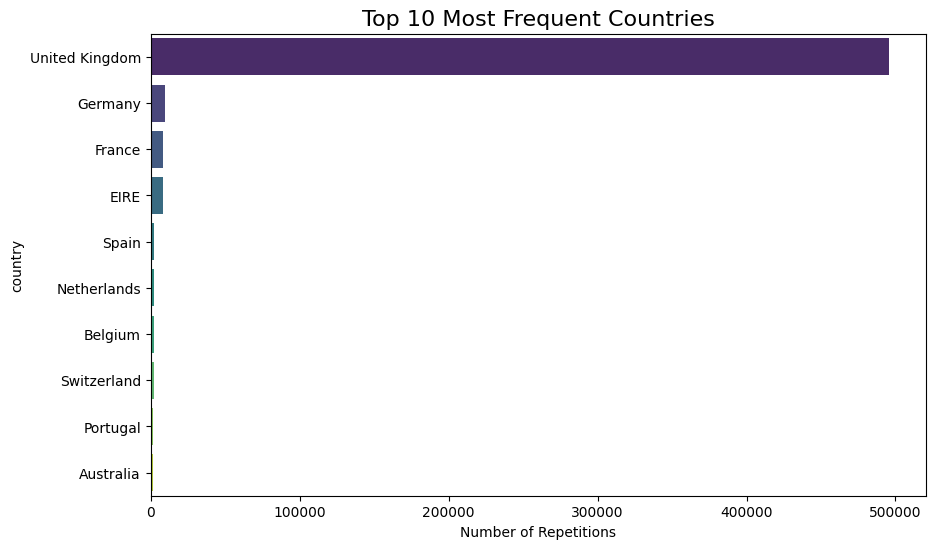

In [ ]:
country_count = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()

<ipython-input-9-a5a207d5d5c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_triend.values, y=time_triend.index, palette='viridis')


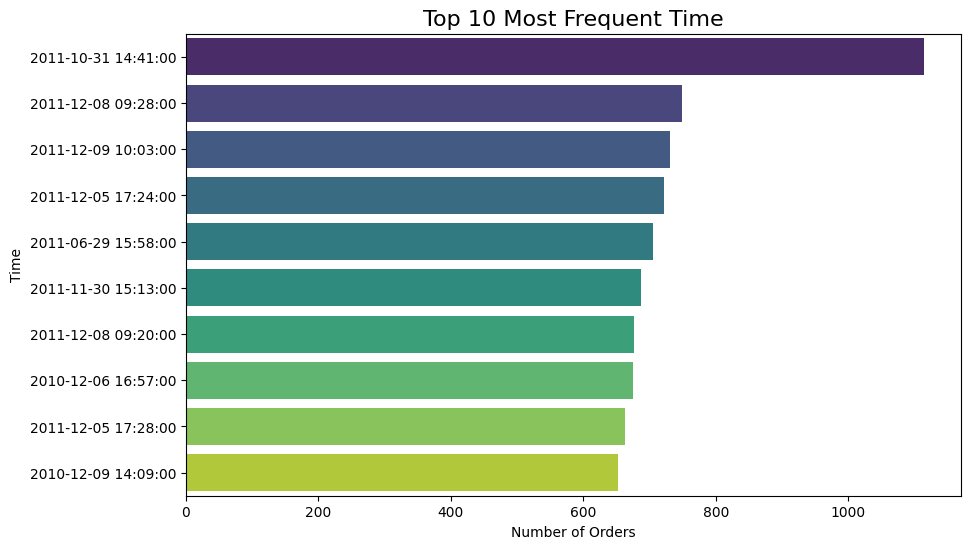

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d.%f')
time_triend = df['InvoiceDate'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=time_triend.values, y=time_triend.index, palette='viridis')
plt.title('Top 10 Most Frequent Time', fontsize=16)
plt.xlabel('Number of Orders')
plt.ylabel('Time')
plt.show()

<ipython-input-10-c7353bf742b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=description_count.values, y=description_count.index, palette='viridis')


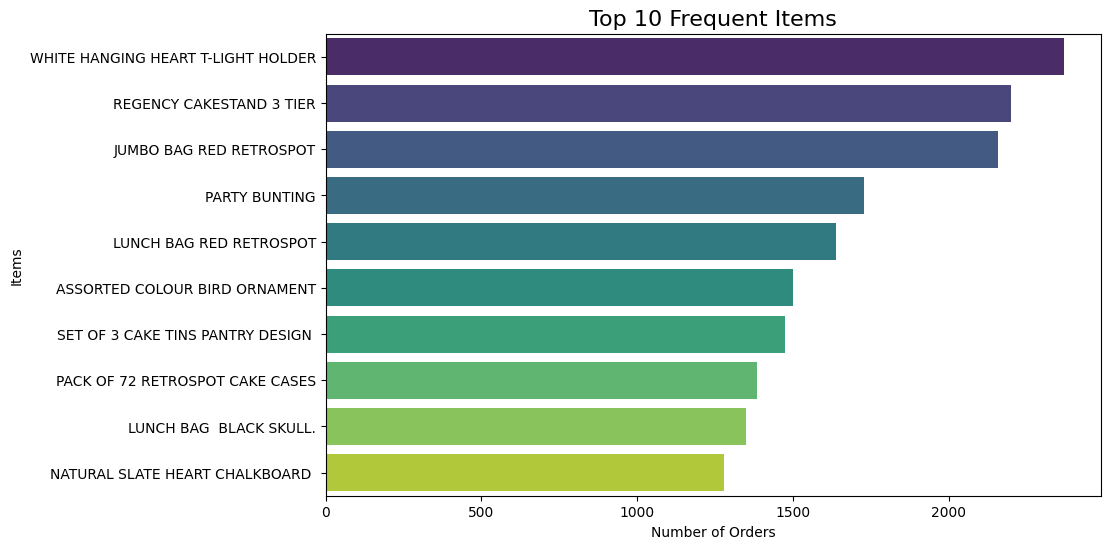

In [ ]:
description_count = df["Description"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=description_count.values, y=description_count.index, palette='viridis')
plt.title("Top 10 Frequent Items", fontsize=16)
plt.xlabel("Number of Orders")
plt.ylabel("Items")
plt.show()

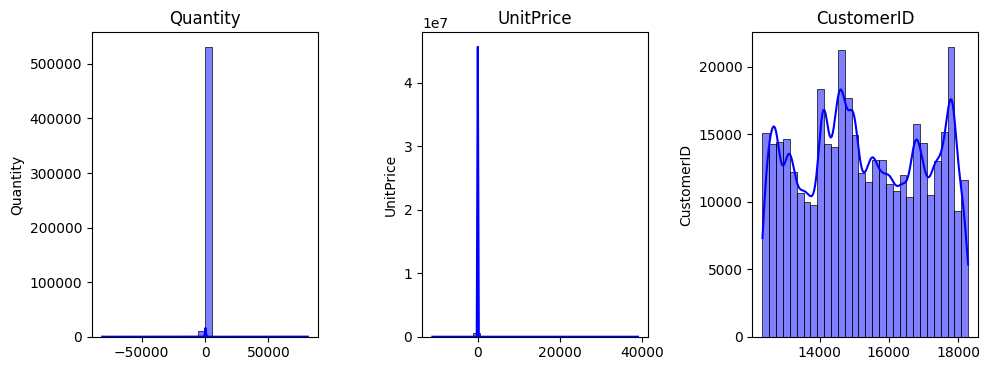

In [ ]:
plt.figure(figsize=(10, 4))
for i , feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=df[feature], bins=30, kde=True, color='blue')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

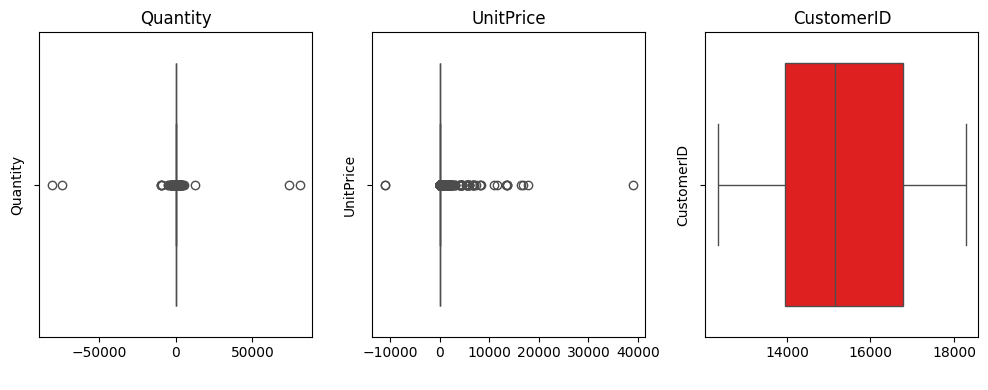

In [ ]:

plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=df[feature], color='red')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(f'{feature}')
plt.tight_layout()

# Очистка

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
def remove_non_existent_country(text):
    if text == "Israel":
        text = "Palestine"
    return text

df["Country"] = df["Country"].apply(remove_non_existent_country)

In [ ]:
q1 = df["Quantity"].quantile(0.30)
q3 = df["Quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]

In [ ]:
q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["UnitPrice"] < upper_limit) & (df["UnitPrice"] > lower_limit)]

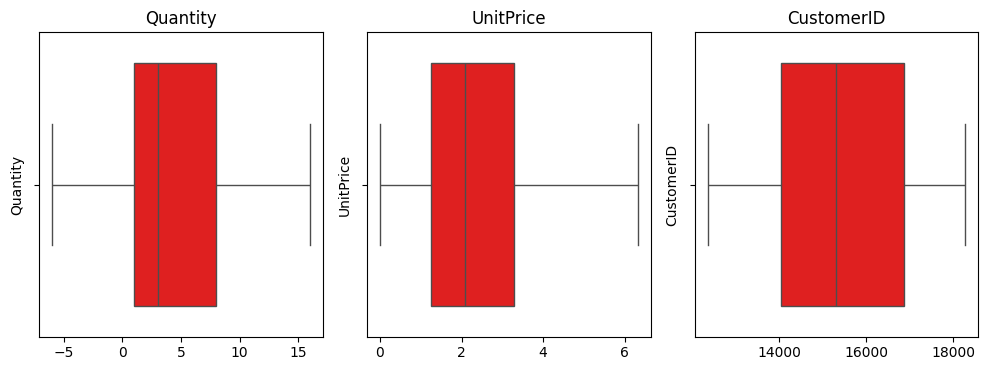

In [ ]:
plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=df[feature], color='red')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(f'{feature}')
plt.tight_layout()

# Кодирование и нормализация

In [ ]:
X = df[["Quantity", "UnitPrice", "Country"]]

In [ ]:
encoder = LabelEncoder()

X["Country"] = encoder.fit_transform(X["Country"])

<ipython-input-19-71667047518f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = encoder.fit_transform(X["Country"])
<ipython-input-20-71667047518f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = encoder.fit_transform(X["Country"])


In [ ]:
X.dropna(inplace=True)

<ipython-input-21-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [ ]:
X.isnull().sum()

,0
Quantity,0
UnitPrice,0
Country,0


In [ ]:
X["total_price"] = X["Quantity"] * X["UnitPrice"]
X

<ipython-input-23-6222f90b164f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["total_price"] = X["Quantity"] * X["UnitPrice"]


,Quantity,UnitPrice,Country,total_price
0,6,2.55,36,15.30
1,6,3.39,36,20.34
2,8,2.75,36,22.00
3,6,3.39,36,20.34
4,6,3.39,36,20.34
...,...,...,...,...
541904,12,0.85,13,10.20
541905,6,2.10,13,12.60
541906,4,4.15,13,16.60
541907,4,4.15,13,16.60


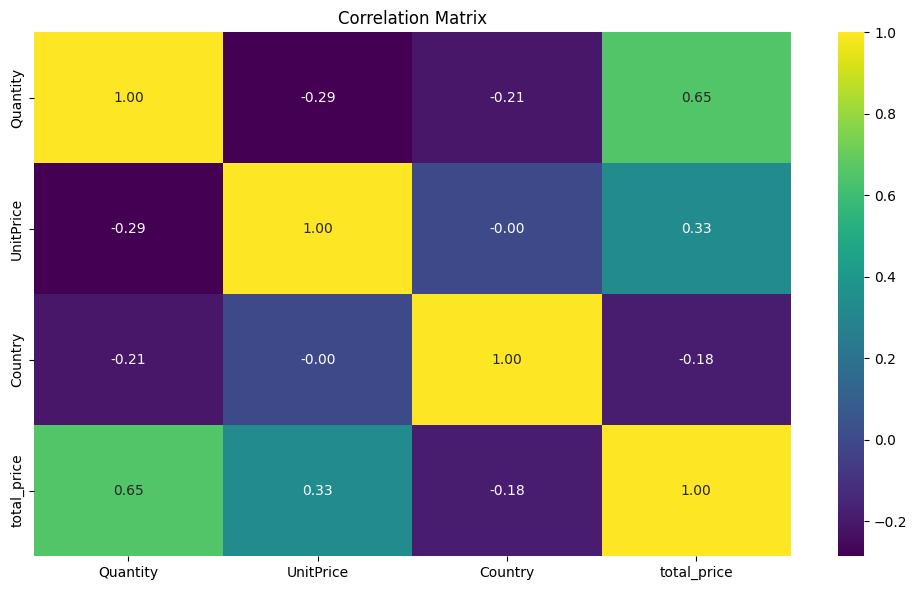

In [ ]:
#Correlation Matrix
corr = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Нормализация

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

#Кластеризация

In [ ]:
wcss = []
for i in range(2, 7):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

График характерной зависимости ошибки E отнесения экземпляра к определенному классу от номера итерации i метода k-means и количества кластеров k:

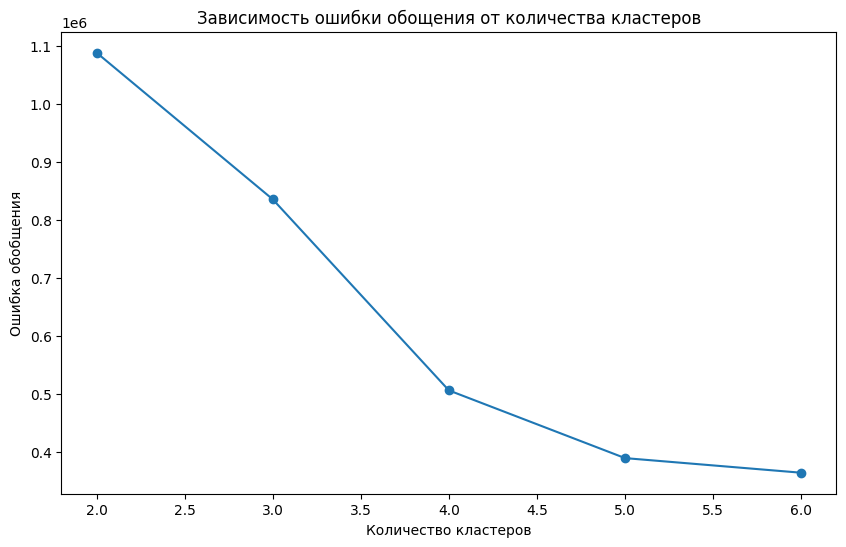

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), wcss, marker='o')
plt.title('Зависимость ошибки обощения от количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка обобщения')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

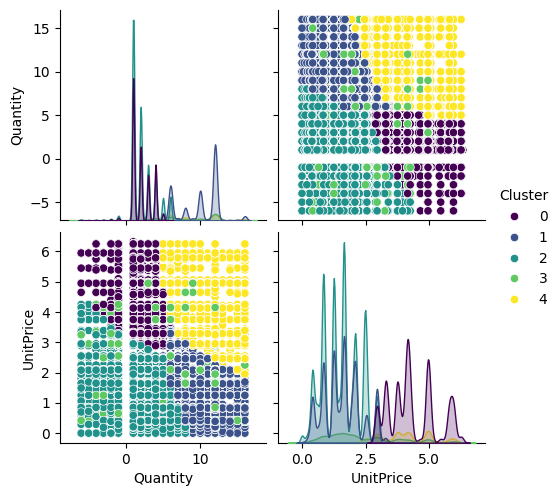

In [ ]:
sns.pairplot(df, hue='Cluster', vars=['Quantity', 'UnitPrice',], palette='viridis')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


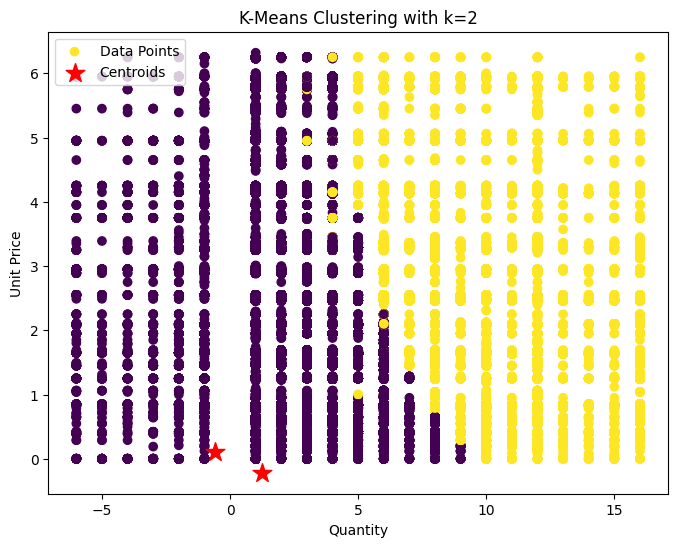

SSE for k=2: 1088362.8680242854
Silhouette score for k=2: 0.42003105905649757


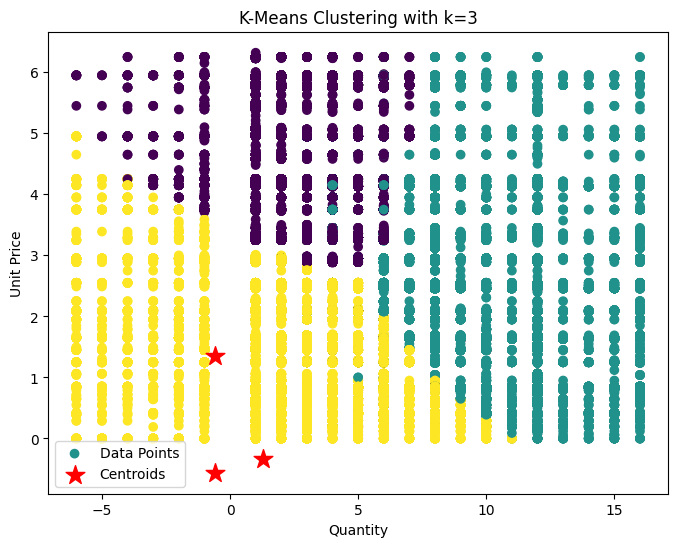

SSE for k=3: 835610.5882635287
Silhouette score for k=3: 0.3958422630312992


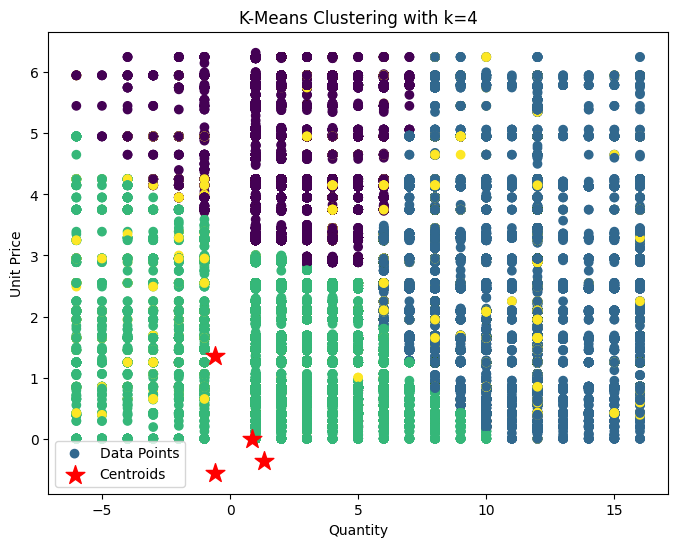

SSE for k=4: 506236.1767200088
Silhouette score for k=4: 0.46039505208821396


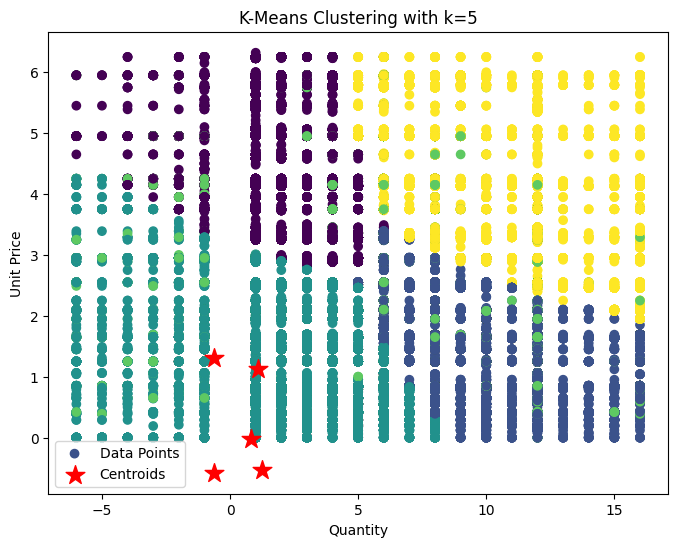

SSE for k=5: 389528.81594562903
Silhouette score for k=5: 0.4743466491414127


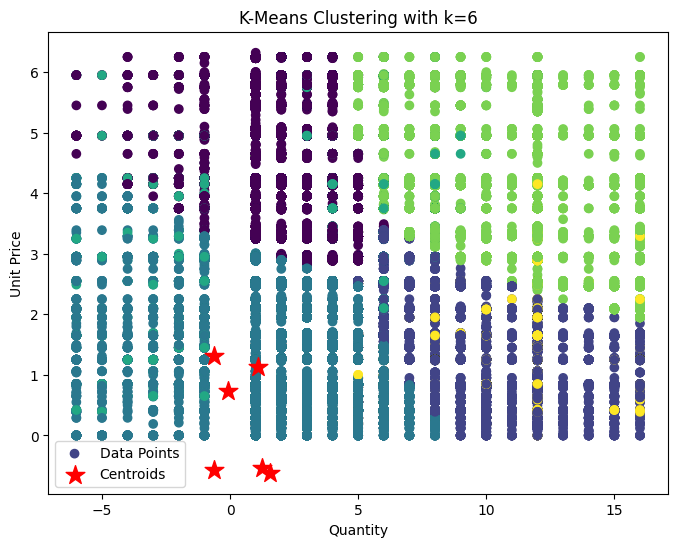

SSE for k=6: 364338.7009279974
Silhouette score for k=6: 0.46735252109561104


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Perform k-means clustering for k=2, 3, 4
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Added random_state for reproducibility
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Quantity"], df["UnitPrice"], c=labels, cmap='viridis', marker='o', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", c="red", s=200, label='Centroids')
    plt.title(f"K-Means Clustering with k={k}")
    plt.xlabel("Quantity")
    plt.ylabel("Unit Price")
    plt.legend()
    plt.show()

    # Calculate the sum of squared errors
    SSE = kmeans.inertia_
    print(f"SSE for k={k}: {SSE}")

    # Calculate silhouette score
    silhouette = silhouette_score(X, labels)
    print(f"Silhouette score for k={k}: {silhouette}")